In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set()

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Check Duplication and Count the Missing value

In [3]:
print("Duplicate Record:\n",data.duplicated().sum())
print("NaN Count :\n",data.isna().sum())

Duplicate Record:
 0
NaN Count :
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [4]:
data['gender'] = data['gender'].replace({'Male':1, 'Female':0})
data.drop('id', axis= 1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data['smoking_status']=data['smoking_status'].fillna('Unknown')
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,0,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
pd.cut(data['bmi'],bins=[data.bmi.min(),16,18.5,25,30,50,data.bmi.max()],
      labels=['severely_underweight','underweight','healthy',
               'overweight','obese','severely_obese']).value_counts().sort_values(ascending=False)

obese                   1814
overweight              1409
healthy                 1258
underweight              257
severely_underweight      91
severely_obese            79
Name: bmi, dtype: int64

In [12]:
df=data.drop(data[(data['bmi'] < 16)^(data['bmi']>50)].index,inplace=False)
df[['bmi']].describe()

,bmi
count,4746.000000
mean,28.689086
std,6.824401
min,16.000000
25%,23.700000
50%,28.100000
75%,32.800000
max,49.900000


In [13]:
df=df.dropna()

In [ ]:
df.corr()
# As we can notice there's no corr greater than 0.8 or lower tha -0.8

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.275027,0.258717,0.233892,0.340500,0.233962
hypertension,0.275027,1.000000,0.119492,0.174789,0.152302,0.146642
heart_disease,0.258717,0.119492,1.000000,0.159837,0.051858,0.137536
avg_glucose_level,0.233892,0.174789,0.159837,1.000000,0.183211,0.140365
bmi,0.340500,0.152302,0.051858,0.183211,1.000000,0.051975
stroke,0.233962,0.146642,0.137536,0.140365,0.051975,1.000000


#**Visualization**

(-1.1507395359825066,
 1.118834102304144,
 -1.088600819674357,
 1.1250645296026804)

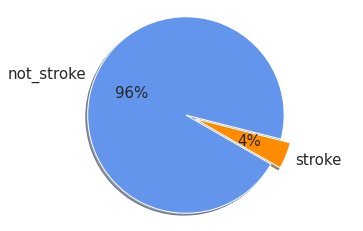

In [ ]:
series=df['stroke'].value_counts()
not_stroke=series.values[0]
stroke=series.values[1]
m= [stroke,not_stroke]
label=('stroke','not_stroke')
color=('darkorange','cornflowerblue')
explode=(.05,.05)
fig = plt.figure(figsize =(6, 4))
plt.pie(m, labels = label,explode=explode,colors=color,autopct='%1.0f%%', textprops={'fontsize': 15}, shadow=True, startangle=-30)
plt.axis('equal')

0        2790
1        1955
Other       1
Name: gender, dtype: int64


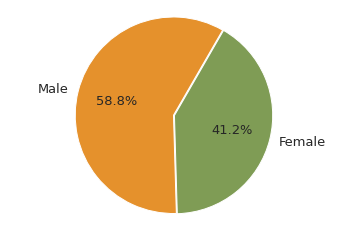

In [ ]:
Male_Series=df['gender'].value_counts()
print(Male_Series)
gender_label=('Male','Female')
gender_color=('#e5912c','#7f9c55')
explode_1=(.01,0)
plt.pie([Male_Series.values[0],Male_Series.values[1]] ,labels= gender_label,
 explode=explode_1, colors= gender_color, autopct='%1.1f%%',
 textprops={'fontsize':13}, startangle= 60)
plt.axis('equal');


In [ ]:
df.drop(df[(df['gender']!=1)  & (df['gender']!=0)].index,inplace=True)

0    119
1     89
Name: gender, dtype: int64


(-1.1119430802230275,
 1.159800907457778,
 -1.1143680985277205,
 1.1542845877079861)

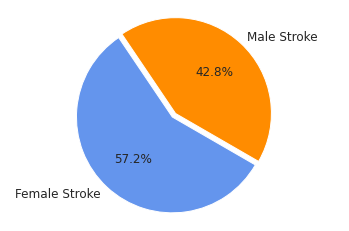

In [ ]:
stroke=df.query('stroke==1')
series_5=stroke['gender'].value_counts()
print(series_5)
stroke_female=series_5.values[0]
stroke_male=series_5.values[1]
data_5= [stroke_male,stroke_female]
label_5=('Male Stroke','Female Stroke')
color_5=('darkorange','cornflowerblue')
explode_5=(.05,0)
plt.pie(data_5, labels = label_5,explode=explode_5,colors=color_5,
 autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

0    168
1     40
Name: heart_disease, dtype: int64


(-1.1119430802230275,
 1.159800907457778,
 -1.1143680985277205,
 1.1542845877079861)

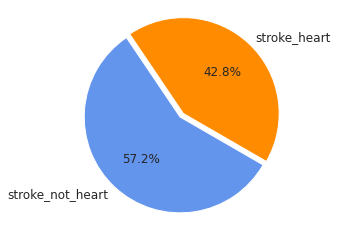

In [ ]:
stroke=df.query('stroke==1')
series_7=stroke['heart_disease'].value_counts()
print(series_7)
stroke_not_heart=series_5.values[0]
stroke_heart=series_7.values[1]
data_7= [stroke_heart,stroke_not_heart]
label_7=('stroke_heart','stroke_not_heart')
color_7=('darkorange','cornflowerblue')
explode_7=(.05,0)
plt.pie(data_5, labels = label_7,explode=explode_7,colors=color_7,
 autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

Urban    109
Rural     99
Name: Residence_type, dtype: int64


(-1.1119430802230275,
 1.159800907457778,
 -1.1143680985277205,
 1.1542845877079861)

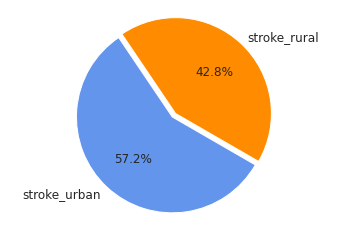

In [ ]:
stroke=df.query('stroke==1')
series_8=stroke['Residence_type'].value_counts()
print(series_8)
stroke_urban=series_8.values[0]
stroke_rural=series_8.values[1]
data_8= [stroke_urban,stroke_rural]
label_8=('stroke_rural','stroke_urban')
color_8=('darkorange','cornflowerblue')
explode_8=(.05,0)
plt.pie(data_5, labels = label_8,explode=explode_8,colors=color_8,
 autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

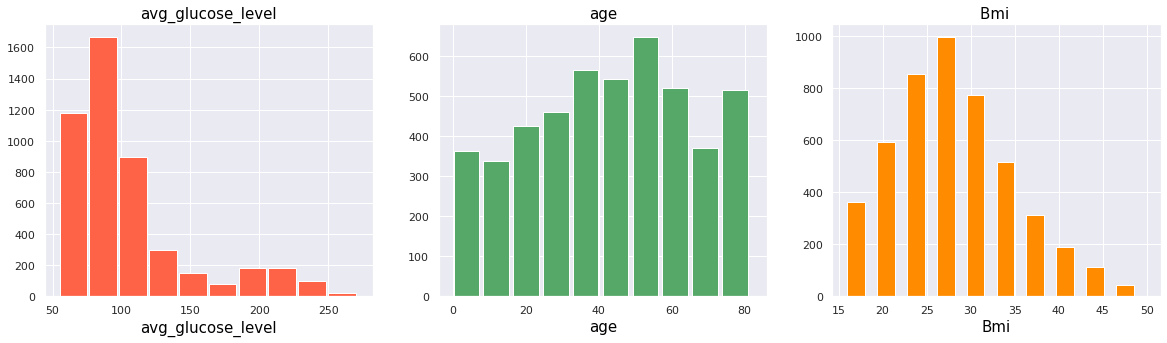

In [ ]:
figure1, axis1 = plt.subplots(1,3, figsize = (20,5))
# avg_glucose_level hist
axis1[0].hist(df['avg_glucose_level'],color='tomato',width=20)
axis1[0].set_title('avg_glucose_level',fontsize='15',color="black")
axis1[0].set_xlabel('avg_glucose_level',fontsize='15',color="black")

# Age hist
axis1[1].hist(df['age'],color='g',width=7)
axis1[1].set_title('age',fontsize='15',color="black")
axis1[1].set_xlabel('age',fontsize='15',color="black")

# bmi hist
axis1[2].hist(df['bmi'],color='DarkOrange',width=2)
axis1[2].set_title('Bmi ',fontsize='15',color="black")
axis1[2].set_xlabel('Bmi',fontsize='15',color="black")

plt.show()

never smoked       83
formerly smoked    57
smokes             39
Unknown            29
Name: smoking_status, dtype: int64


(-1.11092651094331, 1.1628489317642081, -1.109140481909105, 1.1793085890422434)

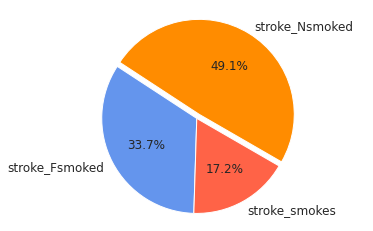

In [ ]:
stroke=df.query('stroke==1')
series_5=stroke['smoking_status'].value_counts()
print(series_5)
stroke_Nsmoked=series_5.values[0]
stroke_Fsmoked=series_5.values[1]
stroke_smokes=series_5.values[3]
data_5= [stroke_Nsmoked,stroke_Fsmoked,stroke_smokes]
label_5=('stroke_Nsmoked','stroke_Fsmoked','stroke_smokes')
color_5=('darkorange','cornflowerblue','tomato')
explode_5=(.05,0,0)
plt.pie(data_5, labels = label_5,explode=explode_5,colors=color_5,
 autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

In [ ]:
df['smoking_status'].replace({'formerly smoked': 0, 'never smoked':1,'smokes':2 ,"Unknown":-1} , inplace=True)


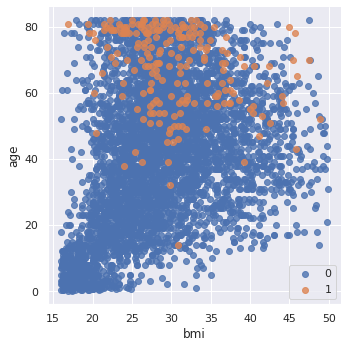

In [ ]:
sns.lmplot(x="bmi", y="age", data=df, hue="stroke", fit_reg=False, legend=False)
plt.legend()
plt.xlabel("bmi")
plt.ylabel("age")
plt.show()

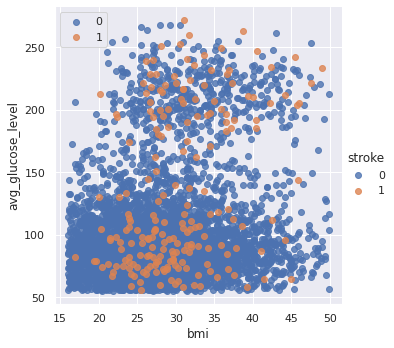

In [ ]:
sns.lmplot(x="bmi", y="avg_glucose_level", data=df, hue="stroke", fit_reg=False, legend=True)
plt.legend()
plt.xlabel("bmi")
plt.ylabel("avg_glucose_level")
plt.show()

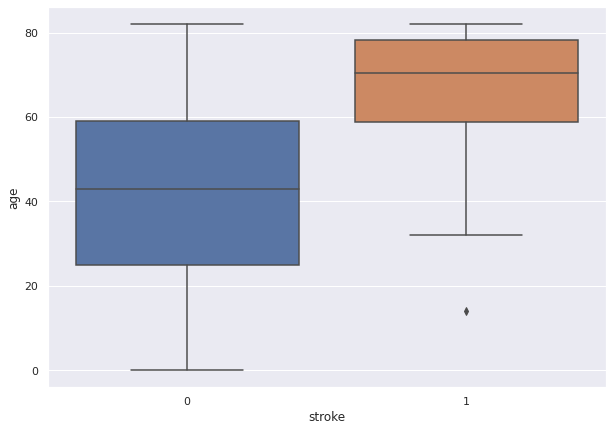

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(x="stroke", y="age", data=df )
plt.show()

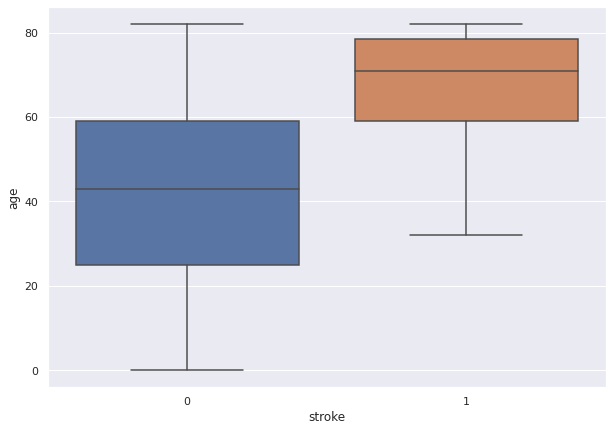

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,0,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,1
5,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,No,children,Rural,103.08,18.6,-1,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,1,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,1,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,0


In [ ]:
data_stroke_1 = df[df.stroke == 1]
Q1 = data_stroke_1.age.quantile(0.25)
Q3 = data_stroke_1.age.quantile(0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR
df.drop(data_stroke_1[(data_stroke_1['age'] < Lower_limit) ^ (data_stroke_1['age'] > Upper_limit)].index,inplace=True)
plt.figure(figsize = (10, 7))
sns.boxplot(x="stroke", y="age", data=df )
plt.show()
df

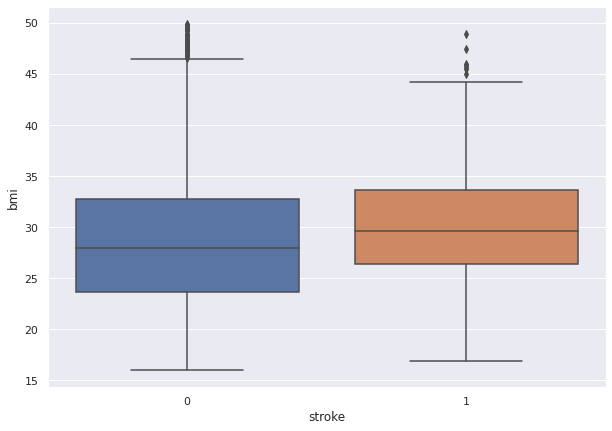

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(x="stroke", y="bmi", data=df )
plt.show()

Q1= 26.4
Q3= 33.650000000000006
Upper_limit= 44.52500000000002
Lower_limit= 15.524999999999988


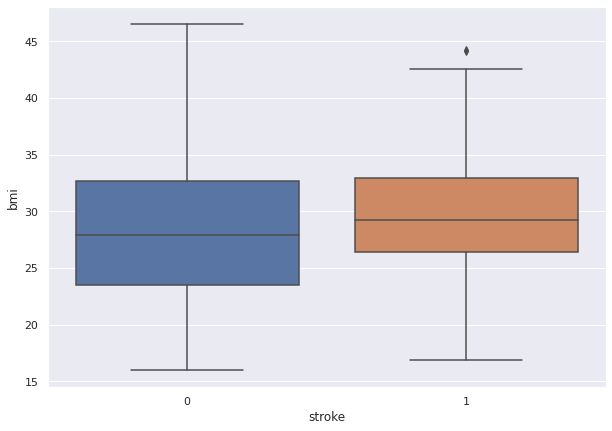

In [ ]:
data_stroke_1 = df[df.stroke==1]
Q1 = data_stroke_1.bmi.quantile(0.25)
Q3 = data_stroke_1.bmi.quantile(0.75)
print("Q1=",Q1)
print("Q3=",Q3)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q1 + 2.5*IQR
print("Upper_limit=",Upper_limit)
print("Lower_limit=",Lower_limit)
df.drop(data_stroke_1[(data_stroke_1['bmi'] > Upper_limit) ^ (data_stroke_1['bmi'] < Lower_limit)].index,inplace=True)
data_stroke_2 = df[df.stroke==0]
Q1 = data_stroke_2.bmi.quantile(0.25)
Q3 = data_stroke_2.bmi.quantile(0.75)
IQR = Q3 - Q1
Upper_limit1 = Q3 + 1.5*IQR
df.drop(data_stroke_2[(data_stroke_2['bmi'] > Upper_limit1)].index,inplace=True)
plt.figure(figsize = (10, 7))
sns.boxplot(x="stroke", y="bmi", data=df)
plt.show()

Private          121
Self-employed     51
Govt_job          28
Name: work_type, dtype: int64


(-1.1036619355496637,
 1.117101342646271,
 -1.1118032751642555,
 1.1644598003972393)

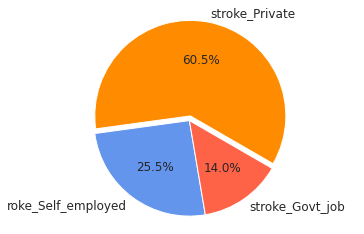

In [ ]:
stroke=df.query('stroke==1')
series_work=stroke['work_type'].value_counts()
print(series_work)
stroke_Private=series_work.values[0]
stroke_Self_employed=series_work.values[1]
stroke_Govt_job=series_work.values[2]
data_work= [stroke_Private,stroke_Self_employed,stroke_Govt_job]
label_work=('stroke_Private','roke_Self_employed','stroke_Govt_job')
color_work=('darkorange','cornflowerblue','tomato')
explode_work=(.05,0,0)
plt.pie(data_work, labels = label_work,explode=explode_work,colors=color_work,
autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

0    143
1     57
Name: hypertension, dtype: int64


(-1.1229832716545702,
 1.0999074199534464,
 -1.1150385504026958,
 1.170296100068059)

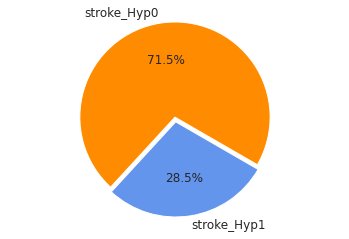

In [ ]:
stroke=df.query('stroke==1')
series_hypertension=stroke['hypertension'].value_counts()
print(series_hypertension)
stroke_Hyp0=series_hypertension.values[0]
stroke_Hyp1=series_hypertension.values[1]
data_hypertension= [stroke_Hyp0,stroke_Hyp1]
label_hypertension=('stroke_Hyp0','stroke_Hyp1')
color_hypertension=('darkorange','cornflowerblue')
explode_hypertension=(.05,0)
plt.pie(data_hypertension, labels = label_hypertension,explode=explode_hypertension,colors=color_hypertension,
autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30)
plt.axis('equal')

In [ ]:
df.iloc[:,4:7]

,ever_married,work_type,Residence_type
0,Yes,Private,Urban
2,Yes,Private,Rural
3,Yes,Private,Urban
4,Yes,Self-employed,Rural
5,Yes,Private,Urban
...,...,...,...
5104,No,children,Rural
5106,Yes,Self-employed,Urban
5107,Yes,Self-employed,Rural
5108,Yes,Private,Rural


**Encoding categorical data**



In [ ]:
# Convert Categorical Data Into Numerical Data

from sklearn.preprocessing import LabelEncoder
OHE = LabelEncoder()
df.ever_married= OHE.fit_transform(df.ever_married)
df.work_type= OHE.fit_transform(df.work_type)
df.Residence_type= OHE.fit_transform(df.Residence_type)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,-1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


# split and test

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,10].values

#x=encoded_data.iloc[:,:-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(3757, 10) (940, 10)
(3757,) (940,)


# Training K-NN Classification model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# finding the best k
test =[()]
for i in range(1,10):
 knnClassifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=2) #minkowski
 knnClassifier.fit(x_train, y_train)
 y_pred = knnClassifier.predict(x_test)
 a = accuracy_score(y_test, y_pred)
 test.append((a,i))
# creating instance of the classifier
knnClassifier = KNeighborsClassifier(n_neighbors = max(test)[1] , metric = 'minkowski',p=2)
knnClassifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn5 = KNeighborsClassifier(n_neighbors =15)
knn1 = KNeighborsClassifier(n_neighbors=8)
knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)

y_pred_5 = knn5.predict(x_test)
y_pred_1 = knn1.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy with k=15", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=8", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=15 95.2127659574468
Accuracy with k=8 95.2127659574468


# Model Accuracy

In [ ]:
y_pred = knnClassifier.predict(x_test)

In [ ]:
acclist = []
knnCm = confusion_matrix(y_test, y_pred)
acclist.append(accuracy_score(y_test, y_pred))
print(knnCm)
#accuracy_score(y_test, knny_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))

[[895   0]
 [ 45   0]]
Accuracy: 0.9521276595744681


# Predicting New values

In [ ]:
# Encoding our input data to be suitable for modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
ct = ColumnTransformer(transformers=[('enocoder',OneHotEncoder(),[0,4,5,6,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
def tun_new_input(x_new):
 '''
 Transforming,Encoding and Scaling the input
 '''
 x_new = [x_new]
 x_new = np.array(ct.fit_transform(x_new))
 return x_new


In [ ]:
knnX_new = tun_new_input(['Male', 67.0 , 0 , 1, 'Yes', 'Private','Urban', 228.69 , 36.6, 'formerly smoked'])
knny_new = np.array(knnClassifier.predict(knnX_new))
knny_new

array([0])

# Decision Tree Classification

### Training the Decision Tree Classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtClassifier = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dtClassifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

## Model Accuracy

In [ ]:
dty_pred = dtClassifier.predict(x_test)
dtCm = confusion_matrix(y_test, dty_pred)
print(dtCm)
acclist.append(accuracy_score(y_test, dty_pred))
print("Accuracy:",accuracy_score(y_test, dty_pred))

[[842  53]
 [ 39   6]]
Accuracy: 0.902127659574468


## Predicting New values

In [ ]:
dtx_new = tun_new_input(['Male', 67.0 , 0 , 1, 'Yes', 'Private','Urban', 228.69 , 36.6, 'formerly smoked'])
dtClassifier.predict(dtx_new)

array([0])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,-1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


## Modifying the dataframe to be suitable

In [ ]:
df_suitable = df.copy()
labels= [0,1,2,3,4,]

df_suitable['avg_glucose_level']= pd.cut(x = df.avg_glucose_level, bins=5, labels=labels,
 retbins = False, duplicates='raise',
 ordered=True)

df_suitable['bmi']= pd.cut(x = df.bmi, bins=5, labels=labels,
 retbins = False, duplicates='raise',
 ordered=True)

df_suitable['age']= df_suitable.age.apply(lambda x: int(x/10)*10)

df_suitable.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,60,0,1,1,2,1,4,3,0,1
2,1,80,0,1,1,2,0,1,2,1,1
3,0,40,0,0,1,2,1,2,3,2,1
4,0,70,1,0,1,3,0,2,1,1,1
5,1,80,0,0,1,2,1,3,2,0,1


In [ ]:
Xc = df_suitable.iloc[:,:-1].values
yc = df_suitable.iloc[:,-1].values
ct2 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop = 'first'), [0,1,2,3,4,5,6,7,8,9])],remainder='passthrough')
Xc = np.array(ct.fit_transform(Xc)) #droping a coulmn to avoid #multicollinearity trap
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc,test_size=0.2,random_state=2)

# Training the model using Bernolli Naive Bayes classifier

In [ ]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer_Naive = BernoulliNB()

# training the model
classifer_Naive.fit(Xc_train, yc_train)

# testing the model
y_predNB = classifer_Naive.predict(Xc_test)

**accuracy of the predicted values using the Bernoulli Naive Bayes classifier.**

In [ ]:
# importing accuracy score of "BernoulliNB"

from sklearn.metrics import accuracy_score , confusion_matrix
# printing the accuracy of the model
cm = confusion_matrix(yc_test, y_predNB)
print(cm)
acclist.append(accuracy_score(yc_test, y_predNB))
print("Accuracy:",accuracy_score(yc_test, y_predNB))

[[872  24]
 [ 42   2]]
Accuracy: 0.9297872340425531


# Conclusion diagram of models accuracy

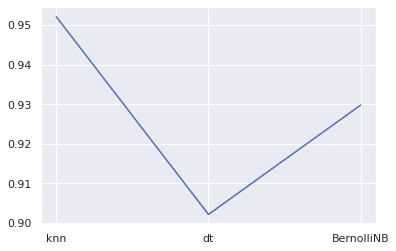

In [ ]:
plt.plot(['knn','dt','BernolliNB'],acclist)